# Project Statement:
AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
1)	Determine the states that are generating the highest revenues and
2)	Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year. 


In [1]:
# Import required libraries 
import os
import pandas as pd
import numpy as np
os.chdir("/Users/arunh/Documents/Python_Project_Data/Sales Analysis project")
pd.set_option('display.max_columns', None)

In [2]:
sales = pd.read_excel('sales.xlsx')

In [3]:
sales.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [4]:
sales.shape

(7560, 6)

In [5]:
# Find the stats for the data
sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


# 1.	Data Wrangling
●	Ensure that the data is clean and that there is no missing or incorrect data. 
○	Inspect the data manually for missing/incorrect data using the functions isna(), and notna().


In [6]:
sales.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [7]:
# There are no missing values available in the data set

In [8]:
# Analysis the  variables

In [9]:
sales['Time'].value_counts()

 Morning      2520
 Afternoon    2520
 Evening      2520
Name: Time, dtype: int64

In [10]:
sales.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [11]:
for column in sales.columns:
    print(f"The column is '{column}' \n& the value count is \n{sales[column].value_counts()}")
    print(sales[column].dtypes)
    print("#####################")

The column is 'Date' 
& the value count is 
2020-10-01    84
2020-12-08    84
2020-12-06    84
2020-12-05    84
2020-12-04    84
              ..
2020-10-29    84
2020-10-28    84
2020-10-27    84
2020-10-26    84
2020-12-30    84
Name: Date, Length: 90, dtype: int64
datetime64[ns]
#####################
The column is 'Time' 
& the value count is 
 Morning      2520
 Afternoon    2520
 Evening      2520
Name: Time, dtype: int64
object
#####################
The column is 'State' 
& the value count is 
 WA     1080
 NT     1080
 SA     1080
 VIC    1080
 QLD    1080
 NSW    1080
 TAS    1080
Name: State, dtype: int64
object
#####################
The column is 'Group' 
& the value count is 
 Kids       1890
 Men        1890
 Women      1890
 Seniors    1890
Name: Group, dtype: int64
object
#####################
The column is 'Unit' 
& the value count is 
9     406
10    402
6     370
8     369
7     362
     ... 
53      9
61      9
54      9
60      7
58      5
Name: Unit, Length: 64, dty

In [12]:
# Threre is no null value in the data set

# ●	Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)

In [13]:
# use normalization technique for the unit variable 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
# make a copy of the data set
scaled_sales = sales.copy(deep=True)

In [15]:
scaled_sales.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [16]:
unit_col = scaled_sales['Unit']

In [17]:
unit_col_2d = unit_col.values.reshape(-1,1)

In [18]:
scaler.fit(unit_col_2d)

MinMaxScaler()

In [19]:
scaled_unit = scaler.transform(unit_col_2d)

In [20]:
scaled_sales['Unit'] =  scaled_unit

In [21]:
scaled_sales.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,20000
1,2020-10-01,Morning,WA,Men,0.095238,20000
2,2020-10-01,Morning,WA,Women,0.031746,10000
3,2020-10-01,Morning,WA,Seniors,0.206349,37500
4,2020-10-01,Afternoon,WA,Kids,0.015873,7500


In [22]:
# make a copy of the data set
sales_new = scaled_sales.copy(deep=True)

In [23]:
sales_new.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,20000
1,2020-10-01,Morning,WA,Men,0.095238,20000
2,2020-10-01,Morning,WA,Women,0.031746,10000
3,2020-10-01,Morning,WA,Seniors,0.206349,37500
4,2020-10-01,Afternoon,WA,Kids,0.015873,7500


# 2.	Data Analysis
●	Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). 
●	Determine which group is generating the highest sales, and which group is generating the lowest sales.
●	Determine which state is generating the highest sales, and which state is generating the lowest sales.
●	Generate weekly, monthly and quarterly reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)


In [24]:
# sales_new.describe()

In [25]:
# Find out the group which is genearting highest sales
group_sales = sales_new.groupby(['Group'])['Sales'].agg(['mean','median','max','min'])
group_sales

,mean,median,max,min
Group,,,,
Kids,45011.904762,35000.0,162500,5000
Men,45370.370370,35000.0,160000,5000
Seniors,44464.285714,35000.0,162500,5000
Women,45207.671958,35000.0,162500,5000


In [26]:
group_sales_sum = sales_new.groupby(['Group'])['Sales'].sum()
group_sales_sum.sort_values(ascending=False)

Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64

Men have high sales & seniors have the low sales in comparision

# Determine which state is generating the highest sales, and which state is generating the lowest sales.

In [27]:
state_sales = sales_new.groupby(["State"])['Sales'].agg(['max','min'])
state_sales

,max,min
State,,
NSW,112500,30000
NT,37500,5000
QLD,62500,7500
SA,87500,25000
TAS,37500,5000
VIC,162500,50000
WA,37500,5000


In [28]:
state_sales_sum = sales_new.groupby(['State'])['Sales'].sum()
state_sales_sum.sort_values(ascending=False)

State
 VIC    105565000
 NSW     74970000
 SA      58857500
 QLD     33417500
 TAS     22760000
 NT      22580000
 WA      22152500
Name: Sales, dtype: int64

State VIC has high slaes & WA has low sales 

# ● Generate weekly, monthly and quarterly reports for the analysis made. 

In [29]:
sales_new

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,20000
1,2020-10-01,Morning,WA,Men,0.095238,20000
2,2020-10-01,Morning,WA,Women,0.031746,10000
3,2020-10-01,Morning,WA,Seniors,0.206349,37500
4,2020-10-01,Afternoon,WA,Kids,0.015873,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,0.190476,35000
7556,2020-12-30,Evening,TAS,Kids,0.206349,37500
7557,2020-12-30,Evening,TAS,Men,0.206349,37500
7558,2020-12-30,Evening,TAS,Women,0.142857,27500


In [30]:
print(sales_new['Date'].max())
print()
print(sales_new['Date'].min())

2020-12-30 00:00:00

2020-10-01 00:00:00


In [31]:
# convert a Date time format
sales_new['Date'] = pd.to_datetime(sales_new['Date'])
sales_new["Month"] = sales_new['Date'].dt.month
sales_new["week"] = sales_new['Date'].dt.week

C:\Users\arunh\AppData\Local\Temp\ipykernel_160\800343497.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sales_new["week"] = sales_new['Date'].dt.week


In [32]:
sales_new.head(5)

,Date,Time,State,Group,Unit,Sales,Month,week
0,2020-10-01,Morning,WA,Kids,0.095238,20000,10,40
1,2020-10-01,Morning,WA,Men,0.095238,20000,10,40
2,2020-10-01,Morning,WA,Women,0.031746,10000,10,40
3,2020-10-01,Morning,WA,Seniors,0.206349,37500,10,40
4,2020-10-01,Afternoon,WA,Kids,0.015873,7500,10,40


In [33]:
sales_new.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'Month', 'week'], dtype='object')

In [34]:
sales_new.reindex(columns=['Date', 'Month', 'week', 'Time', 'State', 'Group', 'Unit', 'Sales'])

,Date,Month,week,Time,State,Group,Unit,Sales
0,2020-10-01,10,40,Morning,WA,Kids,0.095238,20000
1,2020-10-01,10,40,Morning,WA,Men,0.095238,20000
2,2020-10-01,10,40,Morning,WA,Women,0.031746,10000
3,2020-10-01,10,40,Morning,WA,Seniors,0.206349,37500
4,2020-10-01,10,40,Afternoon,WA,Kids,0.015873,7500
...,...,...,...,...,...,...,...,...
7555,2020-12-30,12,53,Afternoon,TAS,Seniors,0.190476,35000
7556,2020-12-30,12,53,Evening,TAS,Kids,0.206349,37500
7557,2020-12-30,12,53,Evening,TAS,Men,0.206349,37500
7558,2020-12-30,12,53,Evening,TAS,Women,0.142857,27500


# Find out Month & week wise sales per Groups

In [35]:
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.width", None)  # Set the display width to fit the data
grouped_month_week_Group = sales_new.groupby(['Month','week','Group'])["Sales"].sum().reset_index()
grouped_month_week_Group.head()

,Month,week,Group,Sales
0,10,40,Kids,3690000
1,10,40,Men,3730000
2,10,40,Seniors,3782500
3,10,40,Women,3842500
4,10,41,Kids,7020000


In [36]:
#Month wise Grouping
# I am applying same method again in next code line aswell using the as_index = False method
# Date_week_Group = grouped_month_week_Group.groupby(["Month",'Group'])["Sales"].sum()
# Date_week_Group

# The above method will create a pandas series object

In [37]:
# Method to groupby sales in basis of month and Group
# this creates a pandas.core.frame.DataFrame
Date_week_Group = grouped_month_week_Group.groupby(["Month",'Group'],as_index=False)["Sales"].sum()
Date_week_Group

,Month,Group,Sales
0,10,Kids,28635000
1,10,Men,28885000
2,10,Seniors,28565000
3,10,Women,28205000
4,11,Kids,22882500
5,11,Men,22615000
6,11,Seniors,22322500
7,11,Women,22862500
8,12,Kids,33555000
9,12,Men,34250000


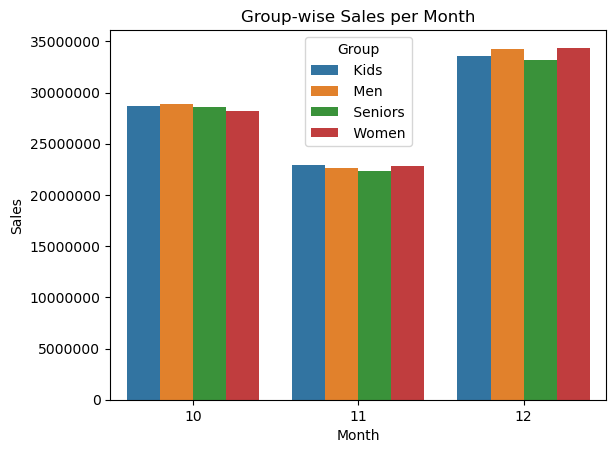

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=Date_week_Group , x='Month' , y='Sales', hue = 'Group')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Group-wise Sales per Month')

# Format the tick labels on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()


In [40]:
# Group by week sales accross Groups
Date_week_Group_new = grouped_month_week_Group.groupby(["week",'Group'],as_index=False)["Sales"].sum()
Date_week_Group_new.head()

,week,Group,Sales
0,40,Kids,3690000
1,40,Men,3730000
2,40,Seniors,3782500
3,40,Women,3842500
4,41,Kids,7020000


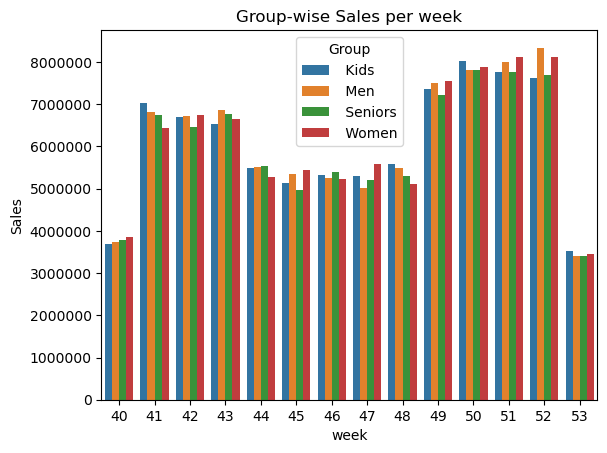

In [41]:
# Plot the same
import seaborn as sns
sns.barplot(data=Date_week_Group_new , x='week' , y='Sales', hue = 'Group')
plt.xlabel('week')
plt.ylabel('Sales')
plt.title('Group-wise Sales per week')

# Format the tick labels on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()

In [45]:
# group by the Sales based on State & Month 
Sales_states_Month_group = sales_new.groupby(['Month','State'], as_index=False)['Sales'].sum()
Sales_states_Month_group.head()

,Month,State,Sales
0,10,NSW,25007500
1,10,NT,8222500
2,10,QLD,11120000
3,10,SA,20610000
4,10,TAS,8015000


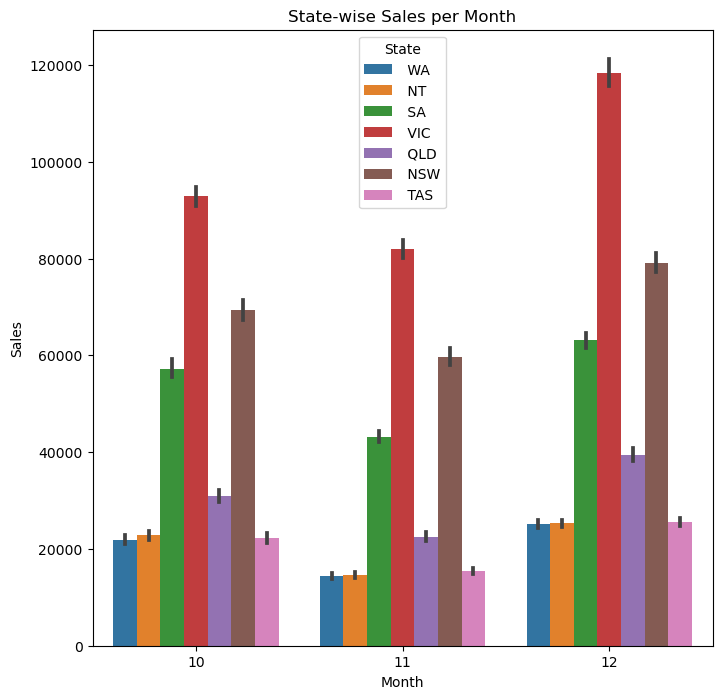

In [55]:
# plot the data 
plt.figure(figsize=(8,8))
sns.barplot(data = sales_new , x='Month',y='Sales', hue='State')

plt.title('State-wise Sales per Month')

# Format the tick labels on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()

In [49]:
# group by the Sales based on State & week
Sales_states_week_group = sales_new.groupby(['week','State'], as_index=False)['Sales'].sum()
Sales_states_week_group.head()

,week,State,Sales
0,40,NSW,3382500
1,40,NT,1052500
2,40,QLD,1627500
3,40,SA,2542500
4,40,TAS,1052500


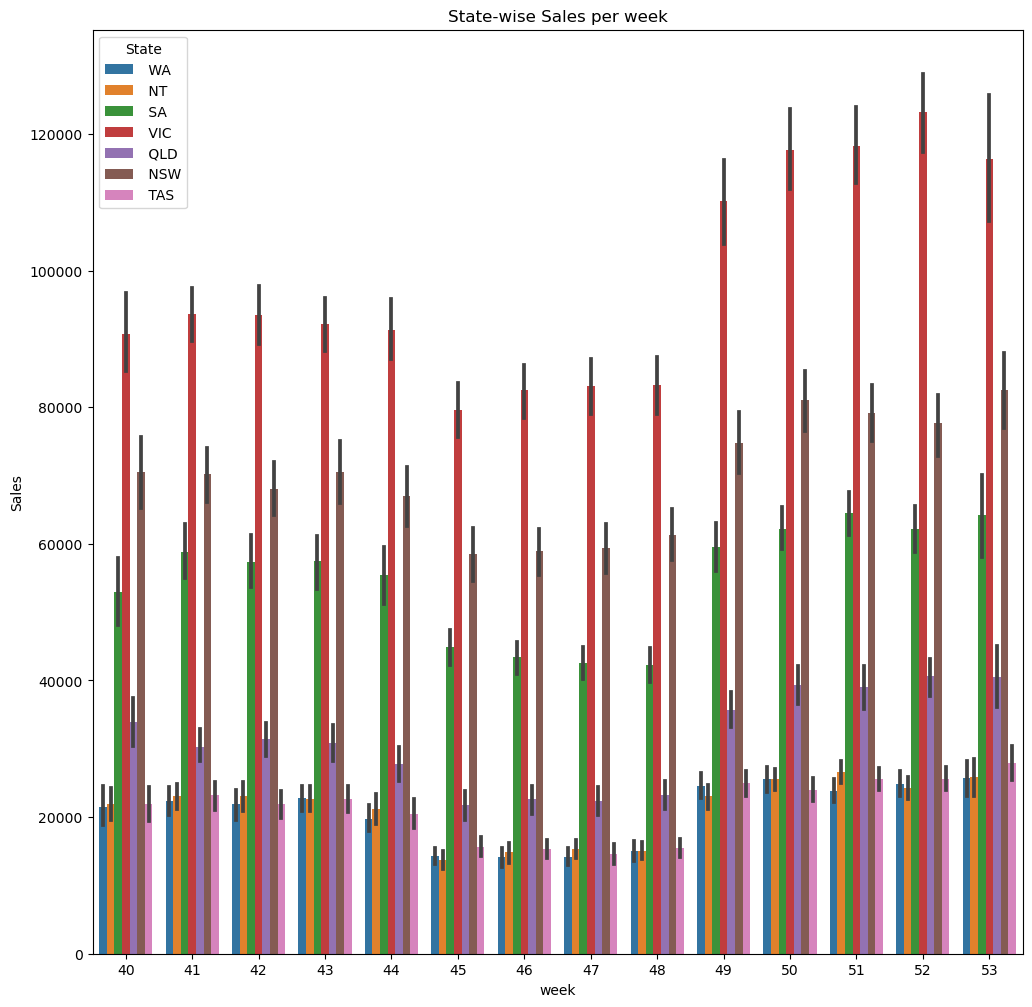

In [53]:
# plot the data 
plt.figure(figsize=(12,12))
sns.barplot(data = sales_new , x='week',y='Sales', hue='State')
plt.title('State-wise Sales per week')

# Format the tick labels on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()

# State of "VIC" is recording higher sales every Month and week followed by 'NSW'

○	Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].

In [57]:
# Find out which time of the day the sales is more

sales_new['Time'].value_counts()

 Morning      2520
 Afternoon    2520
 Evening      2520
Name: Time, dtype: int64

In [76]:
# lets groupby the time
time_grouped =  sales_new.groupby('Time', as_index=False)['Sales'].sum()
time_grouped_forplot = time_grouped.sort_values(by="Sales",ascending=False)
time_grouped_forplot

,Time,Sales
2,Morning,114207500
0,Afternoon,114007500
1,Evening,112087500


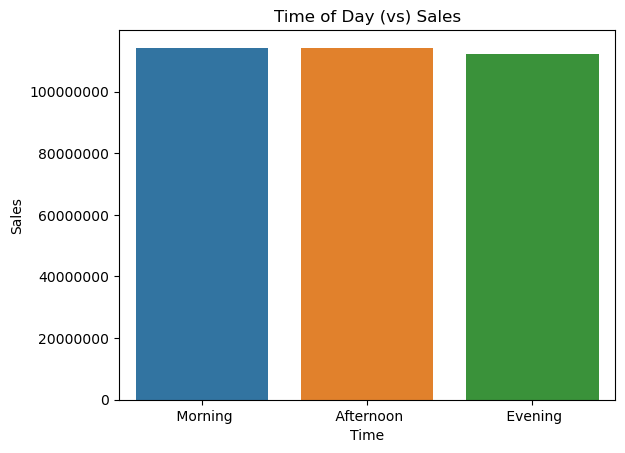

In [78]:
sns.barplot(data=time_grouped_forplot, x="Time", y ="Sales")
# Format the tick labels on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.title("Time of Day (vs) Sales")
plt.show()

# Sales is nearly same accross all the time of the day.

In [87]:
# lets groupby the time of sales accross state
time_grouped_state =  sales_new.groupby(['State','Time'], as_index=False)['Sales'].sum()
time_grouped_state_forplot = time_grouped_state.sort_values(by="Sales",ascending=False)
time_grouped_state_forplot.head()

,State,Time,Sales
17,VIC,Morning,35622500
15,VIC,Afternoon,35062500
16,VIC,Evening,34880000
2,NSW,Morning,25147500
0,NSW,Afternoon,25110000


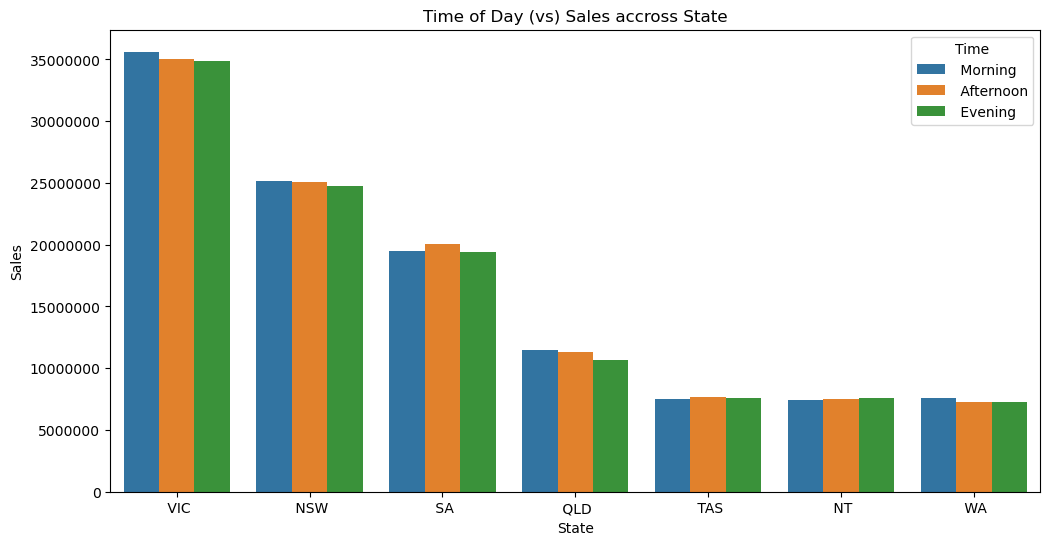

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(data=time_grouped_state_forplot, x="State", y ="Sales", hue = "Time")
# Format the tick labels on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.title("Time of Day (vs) Sales accross State")
plt.show()

# State wise detailed Chart also shows that the Sales in morning is very little more than other times.
# Apart from that sales remains closely same